In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pycaret.classification import *
from pycaret.clustering import *
import numpy as np

In [2]:
songs=pd.DataFrame(pd.read_csv(r'./spotify_data/song_features.csv'))
songs.dropna()
songs["name"].drop_duplicates()
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4555 entries, 0 to 4554
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4555 non-null   object 
 1   name          4555 non-null   object 
 2   artist        4555 non-null   object 
 3   danceability  4555 non-null   float64
 4   energy        4555 non-null   float64
 5   loudness      4555 non-null   float64
 6   speechiness   4555 non-null   float64
 7   acousticness  4555 non-null   float64
 8   liveness      4555 non-null   float64
 9   valence       4555 non-null   float64
 10  tempo         4555 non-null   float64
dtypes: float64(8), object(3)
memory usage: 391.6+ KB


In [3]:
# songs=songs.astype({'danceability':'float32','energy':'float32','loudness':'float32',
#                     'speechiness':'float32','acousticness':'float32','tempo':'float32',
#                     'liveness':'float32','valence':'float32'})
# songs.info()

Min Max Scaler Formula:

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = X_std * (max - min) + min

In [4]:
from sklearn import preprocessing
loudness=songs[['loudness']].values
print(songs['loudness'].head())
min_max_scaler=preprocessing.MinMaxScaler()
loudness_scaled=min_max_scaler.fit_transform(loudness)
songs['loudness']=pd.DataFrame(loudness_scaled)
print(songs['loudness'].head())

0    -3.571
1   -17.352
2    -5.523
3    -4.752
4    -5.509
Name: loudness, dtype: float64
0    0.867130
1    0.478034
2    0.812016
3    0.833785
4    0.812412
Name: loudness, dtype: float64


array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>, <AxesSubplot:>]],
      dtype=object)

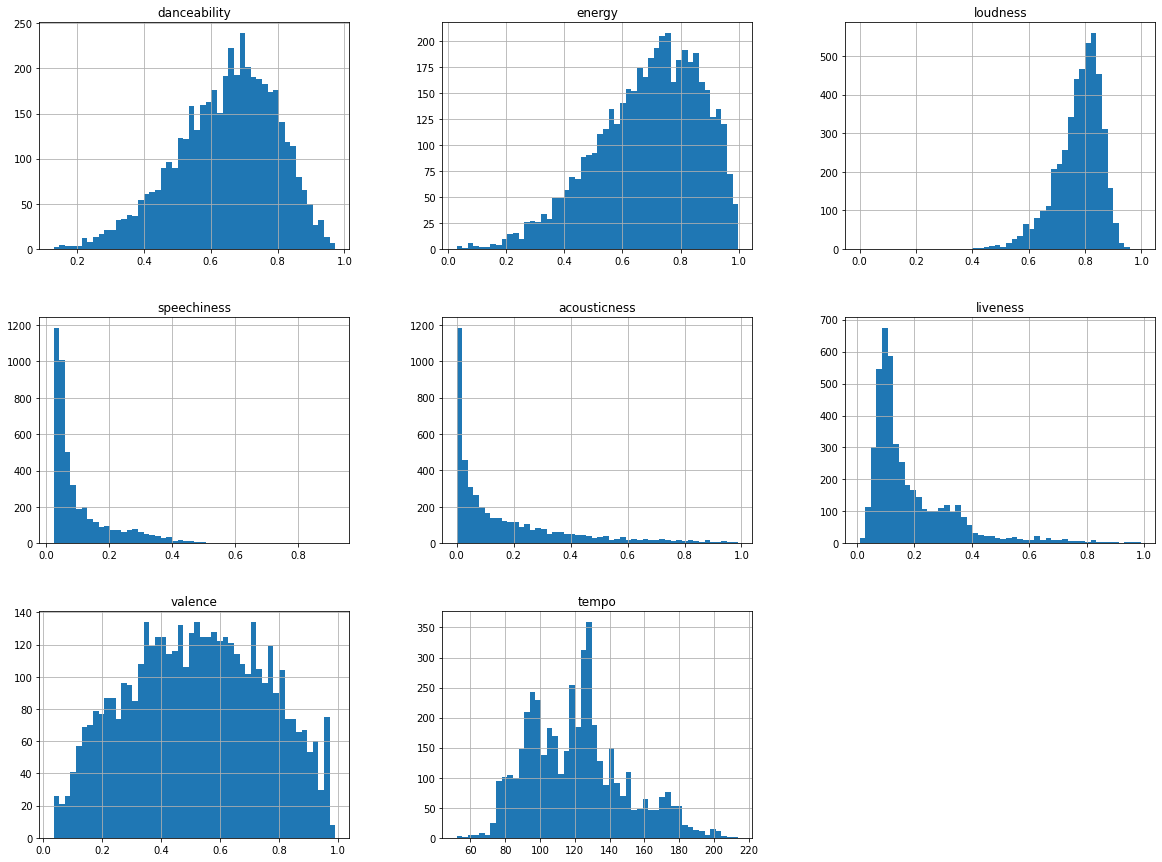

In [5]:
songs.hist(column=None,bins=50,figsize=(20,15))

In [6]:
songs = songs.drop(['energy','valence','tempo'],axis=1)
songs.head()

,id,name,artist,danceability,loudness,speechiness,acousticness,liveness
0,5xBafmhrJzzMsd1dxErIbJ,Nothing Breaks Like a Heart - Don Diablo Remix,Mark Ronson,0.712,0.867130,0.2250,0.1790,0.2030
1,5xbqrbNPBTAOGDA6GD3O46,Words Get In the Way,Miami Sound Machine,0.674,0.478034,0.0329,0.2930,0.1080
2,5XCTZzZ7b8MhPurQIfzD8A,Let U Go,Kyngs,0.680,0.812016,0.0697,0.3890,0.1150
3,5xcXVUm3JiXR3OAuZHqW04,Options,Mr. Pig,0.748,0.833785,0.0532,0.0482,0.0784
4,5XcZRgJv3zMhTqCyESjQrF,Poison,Alice Cooper,0.280,0.812412,0.1090,0.0327,0.1800


In [7]:
songs_features = songs.copy()
songs_features = songs_features.drop(['name','artist','id'],axis=1)
print(songs_features.head())
print(songs_features.info())

   danceability  loudness  speechiness  acousticness  liveness
0         0.712  0.867130       0.2250        0.1790    0.2030
1         0.674  0.478034       0.0329        0.2930    0.1080
2         0.680  0.812016       0.0697        0.3890    0.1150
3         0.748  0.833785       0.0532        0.0482    0.0784
4         0.280  0.812412       0.1090        0.0327    0.1800
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4555 entries, 0 to 4554
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   danceability  4555 non-null   float64
 1   loudness      4555 non-null   float64
 2   speechiness   4555 non-null   float64
 3   acousticness  4555 non-null   float64
 4   liveness      4555 non-null   float64
dtypes: float64(5)
memory usage: 178.1 KB
None


PyCaret Module is now getting used to train and predict the Model

Setup: 

This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function. It takes one mandatory parameter: data. All the other parameters are optional.

In [8]:
feature_setup = setup(data=songs_features,preprocess=True,n_jobs=-1,imputation_type='simple')

,Description,Value
0,session_id,3084
1,Original Data,"(4555, 5)"
2,Missing Values,False
3,Numeric Features,5
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(4555, 5)"
9,CPU Jobs,-1


In [9]:
kmeans=create_model(model='kmeans',num_clusters=4,round=4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2441,1757.2616,1.2263,0,0,0


In [10]:
# assign labels using trained model
kmeans_df = assign_model(model=kmeans,transformation=False)
print(kmeans_df.info())
print(kmeans_df['Cluster'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4555 entries, 0 to 4554
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   danceability  4555 non-null   float64
 1   loudness      4555 non-null   float64
 2   speechiness   4555 non-null   float64
 3   acousticness  4555 non-null   float64
 4   liveness      4555 non-null   float64
 5   Cluster       4555 non-null   object 
dtypes: float64(5), object(1)
memory usage: 213.6+ KB
None
Cluster 0    1926
Cluster 2    1294
Cluster 3     782
Cluster 1     553
Name: Cluster, dtype: int64


In [11]:
plot_model(model=kmeans,plot='cluster',label=False)
#save=True, lets us save the image as HTML in our root directory

In [12]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [13]:
# tuned_clustering=tune_model(model=kmeans,supervised_target='Cluster',supervised_type='classification',supervised_estimator='rf',optimize='Accuracy')

#This wont work cause there is no Target field in the main csv file so we are adding a new csv file with cluster (target) column so that we can train and predict the data using Classifiers

In [14]:
pred_cluster_model=predict_model(model=kmeans,data=songs_features)
print(pred_cluster_model)

      danceability  loudness  speechiness  acousticness  liveness    Cluster
0            0.712  0.867130       0.2250       0.17900    0.2030  Cluster 0
1            0.674  0.478034       0.0329       0.29300    0.1080  Cluster 0
2            0.680  0.812016       0.0697       0.38900    0.1150  Cluster 3
3            0.748  0.833785       0.0532       0.04820    0.0784  Cluster 0
4            0.280  0.812412       0.1090       0.03270    0.1800  Cluster 2
...            ...       ...          ...           ...       ...        ...
4550         0.479  0.804817       0.0878       0.00555    0.3350  Cluster 2
4551         0.963  0.792224       0.1800       0.06730    0.2140  Cluster 0
4552         0.458  0.785646       0.0270       0.71500    0.1150  Cluster 3
4553         0.832  0.829042       0.0633       0.14300    0.0720  Cluster 0
4554         0.664  0.798549       0.0290       0.21700    0.1180  Cluster 0

[4555 rows x 6 columns]


In [15]:
songs['Cluster']=kmeans_df['Cluster']
songs=songs.sample(frac=1)
songs.head()

,id,name,artist,danceability,loudness,speechiness,acousticness,liveness,Cluster
2541,6YmPSmsQqU5PWS5M8b21K1,Bottom Of The Map,Jeezy,0.751,0.784658,0.2770,0.0136,0.0447,Cluster 0
3632,7hzlzoOwCZ4D3Ow5YZK4kj,Insomnia,Daya,0.754,0.824101,0.0611,0.0944,0.3830,Cluster 1
3325,7dUjWnoUXzM1098lSc8k5v,Blueberry Yum Yum,Ludacris,0.964,0.809955,0.1090,0.0393,0.1500,Cluster 0
2437,6XeMrBUyR2aNGI93l9Z27u,Somebody Out There,Lost Kings,0.716,0.780789,0.0396,0.0163,0.2120,Cluster 0
533,67rvuV6oRGppOyXZk9OUrs,Cold as Stone - Kaskade's Sunsoaked Mix,Kaskade,0.466,0.816986,0.0432,0.2880,0.2120,Cluster 2


In [16]:
print("Number of Songs in Each Cluster: \n\n",songs['Cluster'].value_counts())

Number of Songs in Each Cluster: 

 Cluster 0    1926
Cluster 2    1294
Cluster 3     782
Cluster 1     553
Name: Cluster, dtype: int64


In [17]:
print("\nCluster 0:\n\n",songs[songs['Cluster']=='Cluster 0'].mean())
print("\nCluster 1:\n\n",songs[songs['Cluster']=='Cluster 1'].mean())
print("\nCluster 2:\n\n",songs[songs['Cluster']=='Cluster 2'].mean())
print("\nCluster 3:\n\n",songs[songs['Cluster']=='Cluster 3'].mean())


Cluster 0:

 danceability    0.757828
loudness        0.783308
speechiness     0.125743
acousticness    0.115558
liveness        0.139248
dtype: float64

Cluster 1:

 danceability    0.615524
loudness        0.792899
speechiness     0.115092
acousticness    0.087046
liveness        0.497982
dtype: float64

Cluster 2:

 danceability    0.509825
loudness        0.795645
speechiness     0.076549
acousticness    0.065563
liveness        0.152384
dtype: float64

Cluster 3:

 danceability    0.620630
loudness        0.722823
speechiness     0.101878
acousticness    0.576358
liveness        0.160797
dtype: float64


In [18]:
print(songs[songs['Cluster']=='Cluster 0'].head(50))

                          id                                        name  \
2541  6YmPSmsQqU5PWS5M8b21K1                           Bottom Of The Map   
3325  7dUjWnoUXzM1098lSc8k5v                           Blueberry Yum Yum   
2437  6XeMrBUyR2aNGI93l9Z27u                          Somebody Out There   
4139  7pu5jnOlS1k4fmigtRaXvG                     Marlboros & White Widow   
4495  7yJj4umZ3DgeLU3LiU5TN3                                  La Llamada   
1264  6iMoJ3UdrO2ZjzzcaN8Eom                                    Somebody   
3298  7dnLbhOrka4iruYAk7XwJA                                    La Magia   
2812  74SnZzNgU2GOh9Q0xIi4SS               Puercos (Pigs) - Spanish Edit   
855   6DIW7GJbuGZdHolRcPWprP                              Roller Coaster   
4044  7njKgVl3AnLflRad38o7AG                                    Paradise   
2517  6yARPLK0PV4heEyh7pVMGz                                  Part Of Me   
290   61jAJ5ggUq9nDzjc0Yr5CH     Hit Me With Your Best Shot - Remastered   
1876  6q93Ja

In [19]:
print(songs[songs['Cluster']=='Cluster 1'].head(50))

                          id                                      name  \
3632  7hzlzoOwCZ4D3Ow5YZK4kj                                  Insomnia   
2565  6yZAdQyPJtXjATvAT8ERQg                               Coolie High   
3104  7B1Dl3tXqySkB8OPEwVvSu      We'll Be Coming Back (feat. Example)   
783   6Ce9ItNCpk2PkAMq5v6EEV                              C'est La Vie   
2221  6ULwhgWVBtR6wcv4zaXkHv                                 Jailbreak   
614   69ZZXDvtaftXr1vQULoYqB                                Screwed Up   
3573  7HdHOGbA7uyepn1jbPKqOx                                     Roads   
273   614NVFo5csQqRnryl4jXs2                               El Telefono   
330   62Rx9xRAPrUiugB7LLeI6Z                          Hit a Muthafucka   
3000  79xbVOzorykiNjTB6VV6zx                         Poppin' Champagne   
2801  74lnM5V6ecvoTPV0fvptx9               Nuketown (feat. Juice WRLD)   
1007  6fl9npjIxV6oEFrWqJ6tnp                         Anarchy In The UK   
598   69Op4XR486hl5LSiBtPHmp          

In [20]:
print(songs[songs['Cluster']=='Cluster 2'].head(50))

                          id  \
533   67rvuV6oRGppOyXZk9OUrs   
3324  7DUhYlL68zdUkI2ozWS35l   
1818  6PHn6aXuM2FkzonGWJxY28   
18    5XI2EIihxzTlKLR4UUhedn   
2234  6urc3cyjdF95Ip04L0rDDE   
3025  7aBAo2pO8LvrN8mGba7MvA   
3139  7blHz7paIX6m7WGcsC1gQ0   
1354  6jljsFw0Hypb56SgaJSSSg   
3500  7gHs73wELdeycvS48JfIos   
2132  6TIBQ6xqAEbcTDcnXJqgVT   
2963  78TnMTAFmWUWWCgNXR7D3K   
3862  7L7JF5RZ2s5Pb0qSV3V5cW   
2014  6RyaV7owmVU6fzEPE17sF1   
1939  6qYGUxPjQt5PJtWdiNppZx   
3035  7ADRwGz1ZXJxxNw95c9QmY   
4367  7vFv0yFGMJW3qVXbAd9BK9   
22    5XkVQZWvsVwedk0Jv54SVH   
2585  6zeeWid2sgw4lap2jV61PZ   
629   6aAwVy5Hzf44HaXlG6INFO   
536   67uQCds7ugUZn3TZUhc5dB   
1589  6Mf8ozEDo35UcgKgKajrBY   
3233  7cVaF9J51UOzVIKzIdLqNn   
4261  7sofbCzttnuYzcYKVJkbjg   
551   68gzwxDCXwMWz4c0UU4sZG   
80    5YhAAlelWek228jZzxgEfr   
3142  7bnqNC0CBeaD09RGUG3FBm   
1485  6lanRgr6wXibZr8KgzXxBl   
380   63pQm5g0IXLckrv9X3KEyX   
1118  6gsmFgUiSTuinJlScwFODv   
4467  7xTMNK6vQFI6JUctix5Rye   
4111  7p

In [21]:
print(songs[songs['Cluster']=='Cluster 3'].head(50))

                          id  \
3554  7gYwIAHB6VxzLJFSZMMv8i   
3354  7egj375ez0KtF3bYCfAHdZ   
3158  7Bstjkh8Ymg4r7cGAXBbnR   
4132  7pqgMEKsDMOHUdFQ7n0N9K   
1056  6G8fblD9DbcEmaKOKDy3XL   
882   6dww8y59MiIREzWonqzGOy   
4115  7pd0EjaK0m2Er7fEsOzruu   
798   6cmHSmje6WbmoOA05vqAY8   
3373  7EoSDrwBPUBeBEORrpvgko   
3135  7BKLCZ1jbUBVqRi2FVlTVw   
224   601ZisFeoajSaCjatZlYGl   
2105  6t0fYRoZlM5kQ9qT19JnbZ   
2689  71CRvX5TW0CsiCxGZ00IfA   
4385  7vLR7NDAadIXfWjl2nw5Nr   
178   5Zjge6yCThuBMdnJdOBp9A   
1699  6NSMQFKgjpQb0KkjMDYIK0   
1160  6hfNsCnLZyEgDivKqZZntN   
3613  7HRKgCruDphRaLW4wmx8xM   
1676  6NmBxhsmVjv0PMgh8aJhuw   
2215  6UkMcAA19lTdjs22jtB7o2   
558   68mG1MySxGueYJFvuF1ikP   
2440  6xFubQjHKixwjyRrEJZ8En   
2878  76IVpz47q3ghkxoUeTTEKb   
272   612VcBshQcy4mpB2utGc3H   
1630  6mzaCRuLTRiz1caGOum3zT   
4386  7vmiKOPQuGBV3Q2z3He5e9   
1762  6OqiBoHIMpBlzZaCW4HdWy   
4262  7soJgKhQTO8hLP2JPRkL5O   
1893  6QfS2wq5sSC1xAJCQsTSlj   
4351  7uYIX9O9DY6l1D3HiwHR1J   
1369  6J

**Classification of the Dataset Starting from here!**

In [22]:
songs.to_csv('./final_data/finalized.csv',index=False)

In [23]:
final_audio_analysis=pd.DataFrame(pd.read_csv('./final_data/finalized.csv'))
final_audio_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4555 entries, 0 to 4554
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4555 non-null   object 
 1   name          4555 non-null   object 
 2   artist        4555 non-null   object 
 3   danceability  4555 non-null   float64
 4   loudness      4555 non-null   float64
 5   speechiness   4555 non-null   float64
 6   acousticness  4555 non-null   float64
 7   liveness      4555 non-null   float64
 8   Cluster       4555 non-null   object 
dtypes: float64(5), object(4)
memory usage: 320.4+ KB


In [24]:
# final_audio_analysis.astype({'danceability':'float32','loudness':'float32',
#                     'speechiness':'float32','acousticness':'float32','liveness':'float32'})
# print(type(final_audio_analysis))

In [25]:
from pycaret.classification import *
classify_setup=setup(data=final_audio_analysis,target="Cluster")

,Description,Value
0,session_id,7087
1,Target,Cluster
2,Target Type,Multiclass
3,Label Encoded,"Cluster 0: 0, Cluster 1: 1, Cluster 2: 2, Cluster 3: 3"
4,Original Data,"(4555, 9)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [26]:
top3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9787,0.9993,0.9784,0.9791,0.9787,0.9694,0.9696,0.8940
gbc,Gradient Boosting Classifier,0.9680,0.9986,0.9690,0.9689,0.9681,0.9542,0.9545,33.7450
rf,Random Forest Classifier,0.9583,0.9976,0.9544,0.9590,0.9583,0.9402,0.9404,2.9450
dt,Decision Tree Classifier,0.9570,0.9690,0.9540,0.9576,0.9571,0.9383,0.9385,0.4990
et,Extra Trees Classifier,0.9401,0.9952,0.9136,0.9417,0.9390,0.9130,0.9140,7.3750
lr,Logistic Regression,0.9338,0.9945,0.9054,0.9368,0.9328,0.9035,0.9052,3.1630
svm,SVM - Linear Kernel,0.9166,0.0000,0.8966,0.9192,0.9156,0.8789,0.8805,0.9140
knn,K Neighbors Classifier,0.9100,0.9890,0.8821,0.9126,0.9086,0.8690,0.8707,6.3910
ridge,Ridge Classifier,0.8620,0.0000,0.8140,0.8695,0.8587,0.7966,0.8010,0.8010
ada,Ada Boost Classifier,0.8350,0.9622,0.8343,0.8588,0.8241,0.7573,0.7745,2.6280


In [27]:
lightgbm=create_model('lightgbm',round=4,cross_validation=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9875,0.9994,0.9907,0.9875,0.9875,0.9820,0.9820
1,0.9875,0.9999,0.9817,0.9880,0.9876,0.9820,0.9821
2,0.9812,0.9990,0.9780,0.9814,0.9812,0.9730,0.9730
3,0.9749,0.9994,0.9824,0.9760,0.9751,0.9642,0.9644
4,0.9749,0.9996,0.9741,0.9750,0.9749,0.9640,0.9640
5,0.9718,0.9985,0.9740,0.9719,0.9717,0.9595,0.9596
6,0.9687,0.9992,0.9720,0.9702,0.9686,0.9552,0.9560
7,0.9749,0.9994,0.9675,0.9753,0.9750,0.9640,0.9641
8,0.9811,0.9994,0.9806,0.9813,0.9812,0.9730,0.9730
9,0.9843,0.9995,0.9832,0.9845,0.9843,0.9774,0.9775


In [29]:
tuned_light=tune_model(estimator=lightgbm,round=4,n_iter=20,optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9781,0.9993,0.9816,0.9786,0.9781,0.9686,0.9686
1,0.9875,0.9999,0.9822,0.9876,0.9874,0.9819,0.9820
2,0.9781,0.9993,0.9773,0.9783,0.9780,0.9684,0.9685
3,0.9906,0.9997,0.9926,0.9909,0.9906,0.9865,0.9866
4,0.9812,0.9997,0.9797,0.9812,0.9812,0.9730,0.9730
5,0.9812,0.9992,0.9823,0.9814,0.9812,0.9731,0.9731
6,0.9718,0.9997,0.9692,0.9730,0.9718,0.9596,0.9602
7,0.9749,0.9994,0.9743,0.9764,0.9753,0.9641,0.9643
8,0.9780,0.9992,0.9740,0.9780,0.9780,0.9684,0.9684
9,0.9811,0.9996,0.9728,0.9816,0.9811,0.9729,0.9730


In [30]:
evaluate_model(tuned_light)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [34]:
predict_light=predict_model(estimator=tuned_light,data=final_audio_analysis)
print(predict_light.head())

                       id                                     name  \
0  6YmPSmsQqU5PWS5M8b21K1                        Bottom Of The Map   
1  7hzlzoOwCZ4D3Ow5YZK4kj                                 Insomnia   
2  7dUjWnoUXzM1098lSc8k5v                        Blueberry Yum Yum   
3  6XeMrBUyR2aNGI93l9Z27u                       Somebody Out There   
4  67rvuV6oRGppOyXZk9OUrs  Cold as Stone - Kaskade's Sunsoaked Mix   

       artist  danceability  loudness  speechiness  acousticness  liveness  \
0       Jeezy         0.751  0.784658       0.2770        0.0136    0.0447   
1        Daya         0.754  0.824101       0.0611        0.0944    0.3830   
2    Ludacris         0.964  0.809955       0.1090        0.0393    0.1500   
3  Lost Kings         0.716  0.780789       0.0396        0.0163    0.2120   
4     Kaskade         0.466  0.816986       0.0432        0.2880    0.2120   

     Cluster      Label   Score  
0  Cluster 0  Cluster 0  1.0000  
1  Cluster 1  Cluster 1  0.9842  
2  Clust

In [33]:
finalized_light=finalize_model(estimator=tuned_light)

In [35]:
songanalysis_model=save_model(finalized_light,'songanalysis_model')

Transformation Pipeline and Model Succesfully Saved
